<a href="https://colab.research.google.com/github/angelfercontreras/IA_Redes_Neuronales/blob/main/IA_Redes_Neuronales/Actividades%20/RNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
Actividad 5: Uso de software para búsqueda.
Entrenamiento de red neuronal Prealimentada.
Angel Fernando Contreras García - 2017929 - N4
Materia: Inteligencia Artificial y Redes Neuronales
'''

'\nActividad 5: Uso de software para búsqueda.\nEntrenamiento de red neuronal Prealimentada.\nAngel Fernando Contreras García - 2017929 - N4\nMateria: Inteligencia Artificial y Redes Neuronales\n'

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.15.0


In [3]:
keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [4]:
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete','Ocho', 'Nueve']

In [5]:
# Forma de los datos de entrenamiento
x_train.shape

(60000, 28, 28)

In [6]:
# longitud del objeto
len(y_train)

60000

In [7]:
# Conjunto de etiquetas
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
# Cantidad de imagenes del conjunto
x_test.shape

(10000, 28, 28)

In [9]:
# Número de etiquetas
len(y_test)

10000

<function matplotlib.pyplot.show(close=None, block=None)>

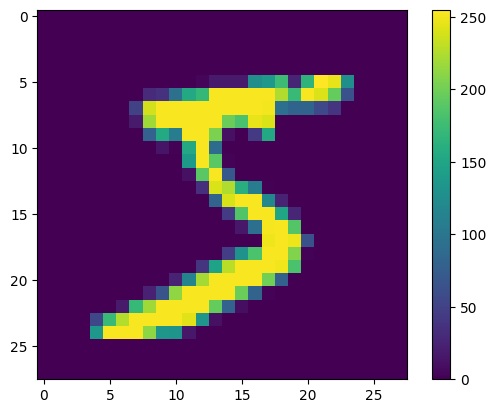

In [10]:
# Primera imagen del conjunto de datos
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show

In [11]:
# Se normalizan los datos
x_train = x_train / 255.0
x_test = x_test / 255.0

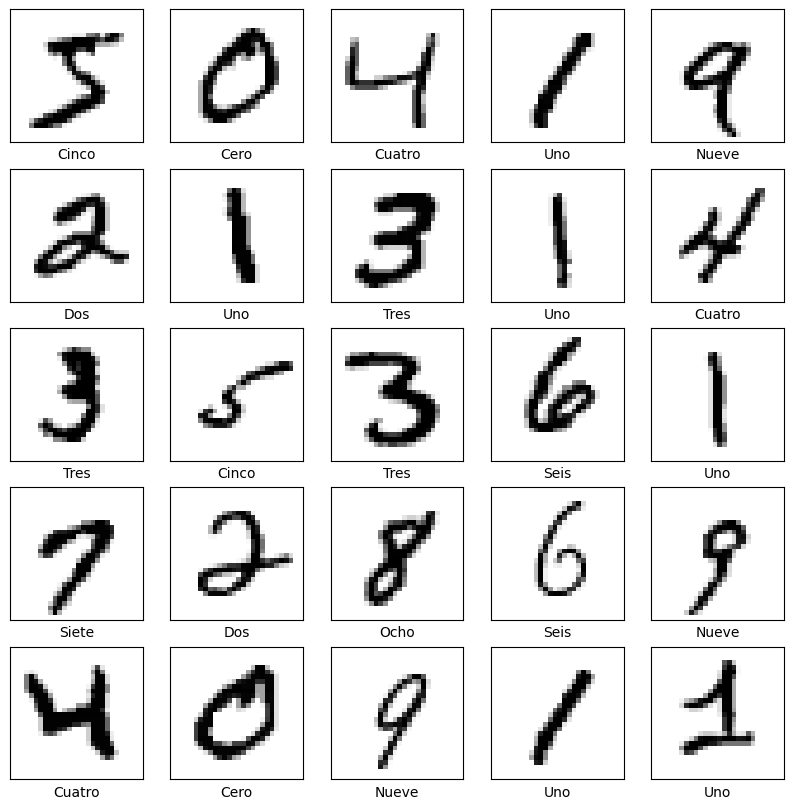

In [12]:
# Primeras 25 imagenes del conjunto de datos
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
plt.show()

In [13]:
# Construyendo capas del modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [14]:
# Compilando modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Entrenando modelo
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2637 - accuracy: 0.9247
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1196 - accuracy: 0.9646
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0815 - accuracy: 0.9757
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0612 - accuracy: 0.9809
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0482 - accuracy: 0.9850
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0379 - accuracy: 0.9880
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0297 - accuracy: 0.9906
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0236 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0199 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.01

In [16]:
# Probando exactitud del modelo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0826 - accuracy: 0.9796 - 638ms/epoch - 2ms/step

Test accuracy: 0.9796000123023987


In [17]:
predicciones = model.predict(x_test)
predicciones[0]
np.argmax(predicciones[0])
y_test[0]
predicciones[5]
np.argmax(predicciones[5])
y_test[5]
predicciones[9]
np.argmax(predicciones[9])
y_test[9]
predicciones[24]
np.argmax(predicciones[24])
y_test[24]
predicciones[3458]
np.argmax(predicciones[3458])
y_test[3458]

313/313 [==============================] - 1s 2ms/step


0

In [18]:
# Se establece modelo de prediccion
prediccion = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [19]:
# Prediccion de 1
prediccion[1]

array([6.2077004e-13, 7.9513035e-07, 9.9999911e-01, 3.7396423e-11,
       1.2642990e-25, 1.7576996e-15, 3.5433885e-13, 1.3403779e-17,
       5.8828560e-11, 1.7056275e-18], dtype=float32)

In [20]:
# Probabilidad
np.argmax(prediccion[1])

2

In [21]:
# Resultado
y_test[1]

2

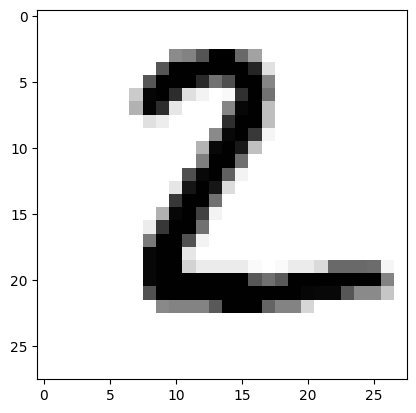

In [22]:
# Se muestra la imagen 1
plt.figure()
plt.imshow(x_test[1], cmap=plt.cm.binary)
plt.show()

In [23]:
# Se visualizan las predicciones
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

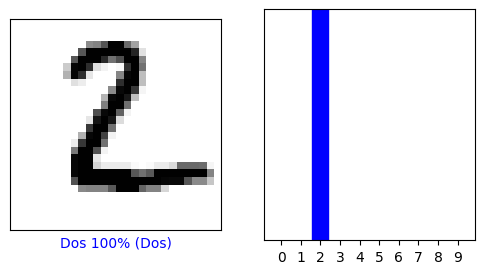

In [24]:
# Grafica de prediccion de imagen 1
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predicciones[i],  y_test)
plt.show()

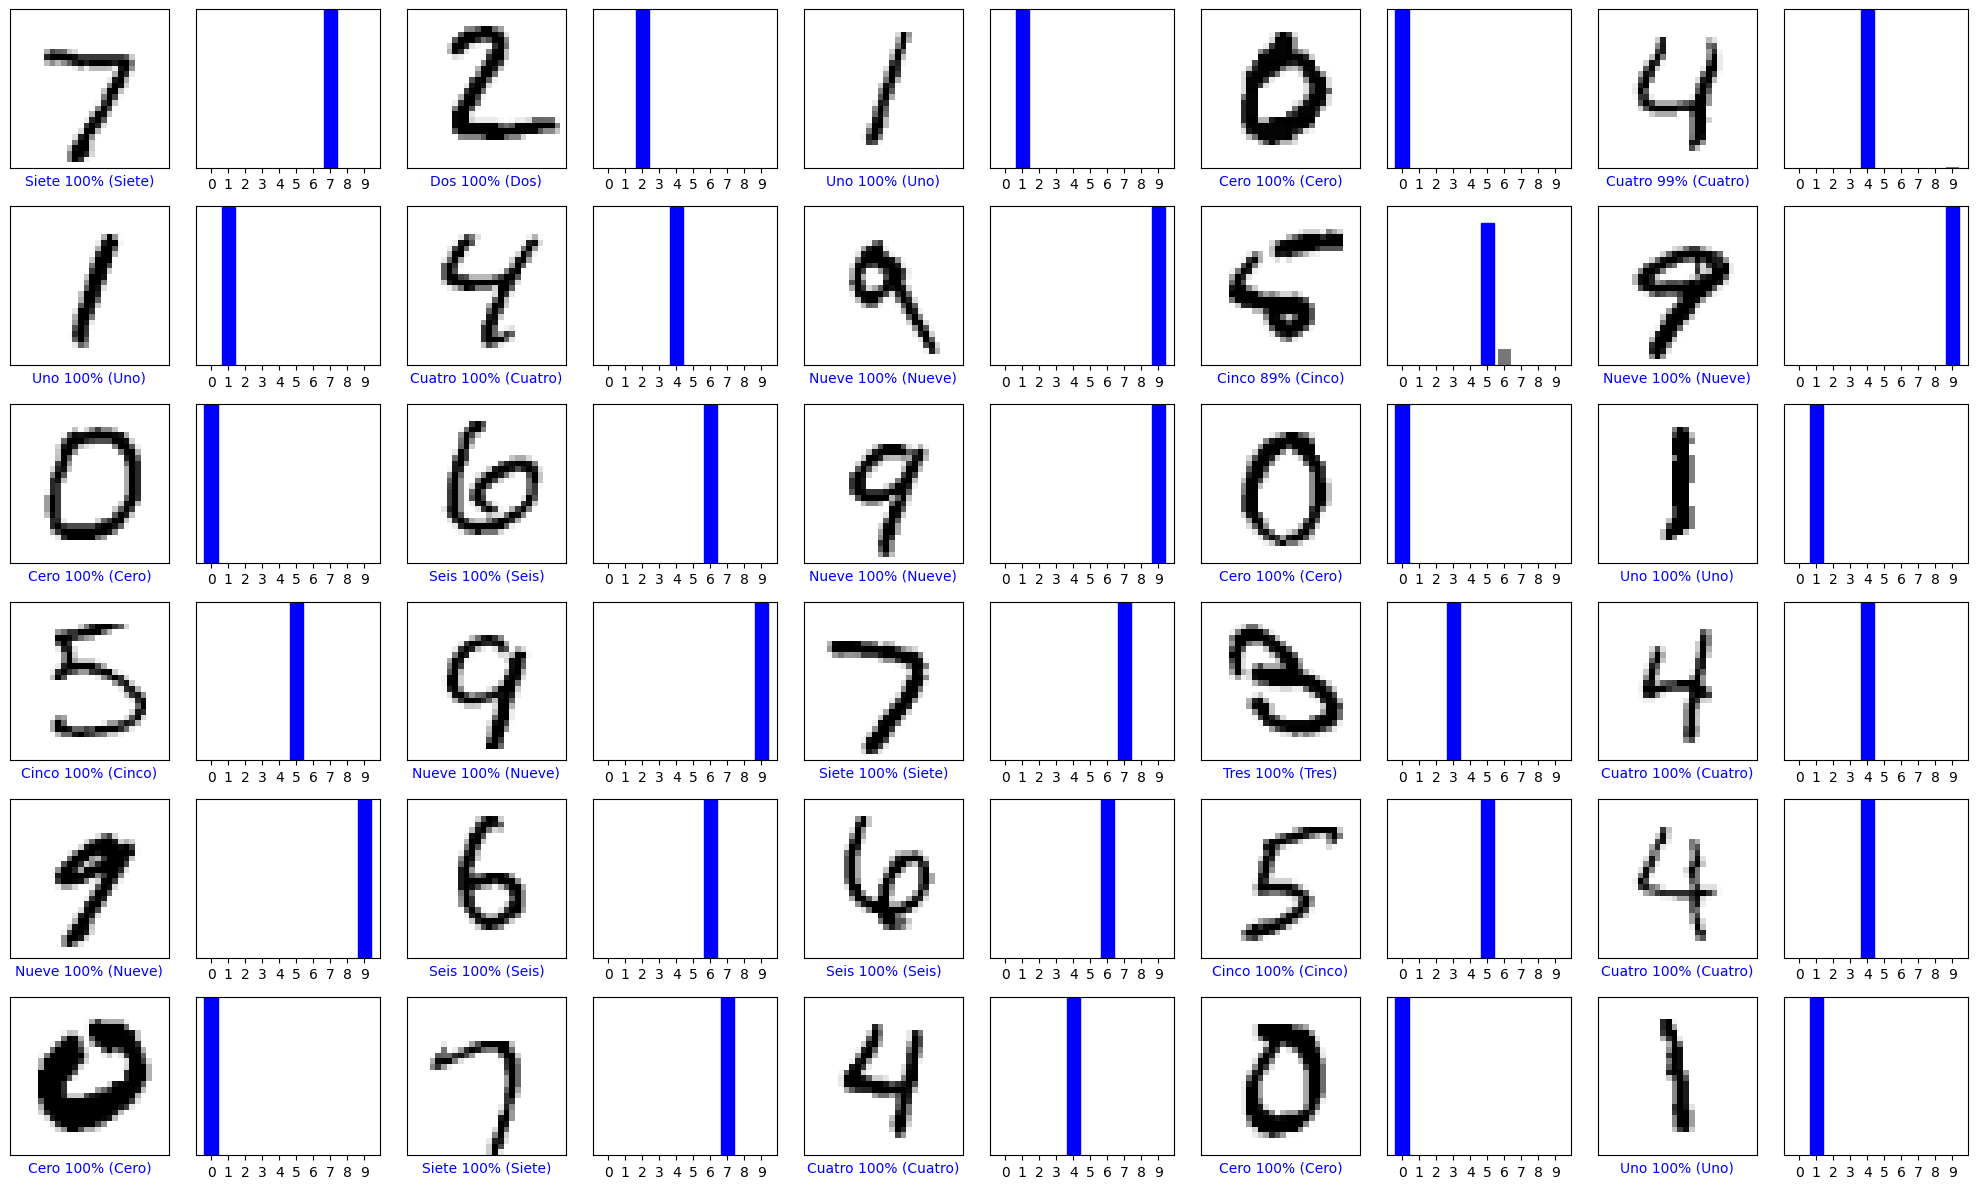

In [25]:
# Se grafican varias imagenes
num_rows = 6
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predicciones[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predicciones[i], y_test)
plt.tight_layout()
plt.show()

In [26]:
# Se selecciona imagen de conjunto de datos de prueba
img = x_test[0]

In [27]:
# Se imprime el tamaño de la imagen
print(img.shape)

(28, 28)


In [28]:
# Se agrega dimension extra
img = (np.expand_dims(img,0))

In [29]:
# Se vuelve a imprimir el tamaño de la imagen
print(img.shape)

(1, 28, 28)


In [30]:
# Se predice del lote que se creo
predictions_single = model.predict(img)

1/1 [==============================] - 0s 20ms/step


In [31]:
# Imprime prediccion del modelo
print(predictions_single)

[[2.7186207e-09 1.0203741e-12 1.4260519e-07 3.7800960e-06 2.2264203e-16
  2.3502058e-12 3.3158997e-17 9.9998808e-01 2.7568963e-09 7.9975416e-06]]


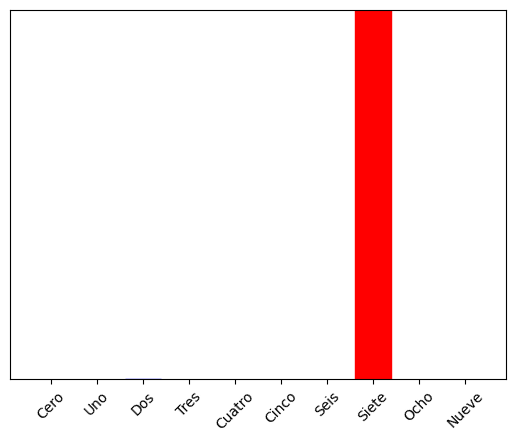

In [32]:
# Se visualiza grafica de probabilidades
plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

In [33]:
# Se puede ver el valor mas alto de la imagen
np.argmax(predictions_single[0])

7